# Plot `N` Wettest Months by County 

In [1]:
%matplotlib notebook
import json
import pathlib

import ipywidgets as widgets

from utils import plot_top_months

## Load data

Load data from relevant CSV files.

In [2]:
csv_directory = pathlib.Path('data/daily/csvs')

with open('data/stations.json', 'rt') as f:
    stations = json.load(f)

with open('data/county_station.json', 'rt') as f:
    county_station = json.load(f)

with open('data/rainfall_ym_by_county.json', 'rt') as f:
    rainfall_data = json.load(f)

## User options 

In [3]:
n_months = widgets.IntSlider(
    value=10,
    min=1,
    max=10,
    step=1,
    description='Number of months',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
n_months

IntSlider(value=10, continuous_update=False, description='Number of months', max=10, min=1)

In [4]:
highlight = widgets.ToggleButtons(
    options=['Top month', 'Past decade*'],
    description='Highlight',
    button_style='',  # 'success', 'info', 'warning', 'danger' or ''
    tooltips=[
        'Highlight only the month with the highest rainfall',
        'Highlight all months after January 2006',
    ]
)
highlight

ToggleButtons(description='Highlight', options=('Top month', 'Past decade*'), tooltips=('Highlight only the mo…

In [5]:
county = widgets.Dropdown(
    options=stations.keys(),
    description='County',
    value='Clare',
)
county

Dropdown(description='County', index=2, options=('Carlow', 'Cavan', 'Clare', 'Cork', 'Donegal', 'Dublin', 'Gal…

## Plot the data

<IPython.core.display.Javascript object>


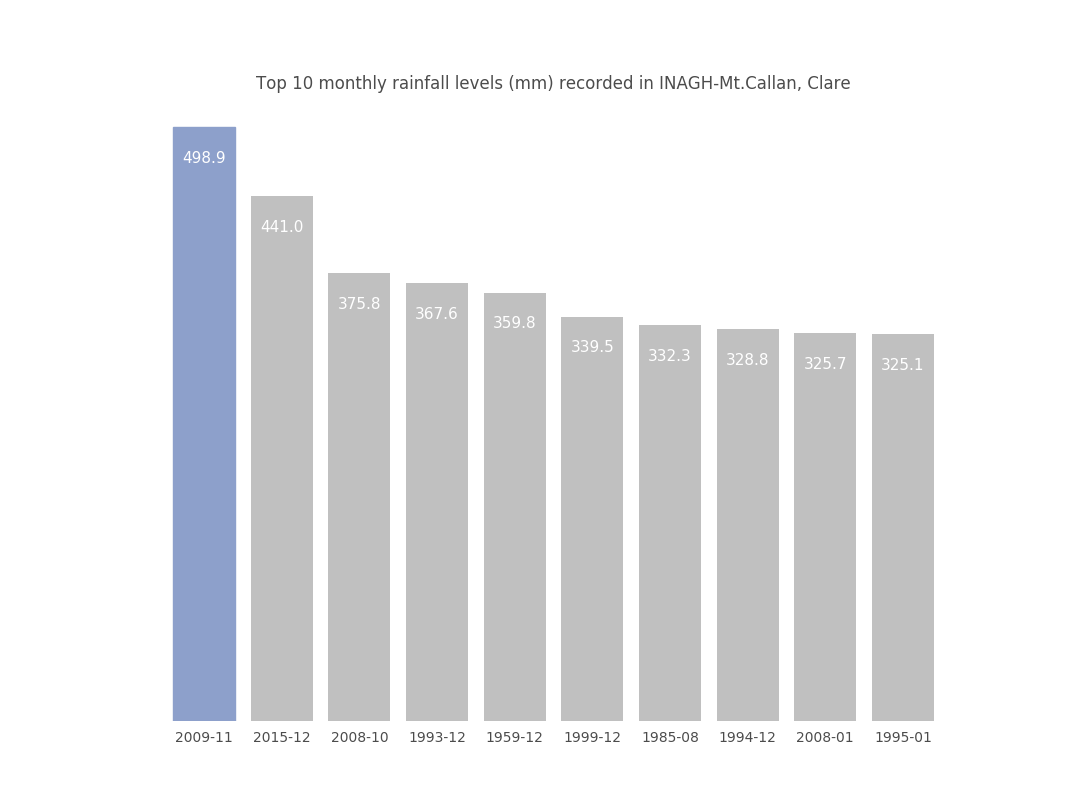

In [6]:
plot_top_months(
    data=rainfall_data,
    county=county.value,
    station_name=county_station[county.value],
    n_months=n_months.value,
    highlight_top_only=(
        True if highlight.value == 'Top month' else False
    ),
)